In [ ]:
def export_audio(audio, count):
    audios = audio.set_frame_rate(16000)
    audios.export(os.path.join('./ConvertAudio/file_{}.wav'.format(str(count))), format='wav')

# hashDict: {speaker: (start, stop)}
def split_silence(audio, speaker):
    os.makedirs('ConvertAudio', exist_ok=True)
    myaudio = AudioSegment.from_file(audio, "wav")
    dbfs = myaudio.dBFS
    duration_in_sec = len(myaudio) / 1000

    mydict = {}
    t_dict = {}

    # Lấy các khoảng silence trong audio
    silences = silence.detect_silence(myaudio,
                                      min_silence_len= 300,
                                      silence_thresh=dbfs-10)
    silences = [((start/1000),(stop/1000)) for start,stop in silences]

    print(silences)

    if len(silences) > 0:
        n_silence = []
        if silences[0][0] == 0.0:
            n_silence.append(silences[0])
            silences.pop(0)

        # Chỉnh lại, làm tròn sec
        for i in silences:
            if round(i[0]) < i[0]:
                temp= (i[0]+0.5, i[1])
            else:
                temp= (round(i[0]), i[1])
            n_silence.append(temp)
        print(n_silence)

        count = 1
        for i in silences:
            temp= './ConvertAudio/file_'+str(count)+'.wav' # vị trí file: lưu file ở thư mục nào thì địa chỉ tới thư mục đó
            t_dict[temp]= i
            count +=1

        # export_file_audio
        start = 0.0
        end = duration_in_sec
        s_audio = myaudio[start*1000:n_silence[0][0]*1000]
        export_audio(s_audio, 1)
        count = 2
        for i in range(len(n_silence)-1):
            s= n_silence[i][1]
            e= n_silence[i+1][0]
            n_audio = myaudio[s*1000:e*1000]
            export_audio(n_audio, count)
            count += 1
        if n_silence[len(n_silence)-1][1] != end:
            e_audio = myaudio[n_silence[len(n_silence)-1][1]*1000:end*1000]
            export_audio(e_audio, count)
            temp= './ConvertAudio/file_'+str(count)+'.wav'
            t_dict[temp] = []

    # final
    mydict[speaker] = t_dict

    # return: {speaker: {file_split_1: (start, stop)}, {file_split_2: (start, stop)}, ...}
    return mydict
speaker = "SPEAKER_1"
audio = "Splited_speaker/23-06-2022 14 12 36/2.wav"
split_silence(audio, speaker)
# print(mydict)

216619
-25.493023276847737


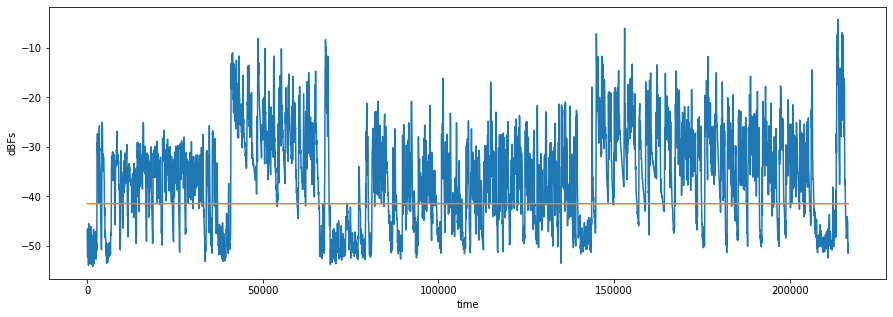

In [7]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
import numpy as np

# seg = AudioSegment.from_file("../Splited_speaker/23-06-2022 14 12 36/2.wav")
seg = AudioSegment.from_file("test.wav")
# Just take the first 3 seconds
width = len(seg)
print(width)
seg_dBFs = []
step = 50
time = list(range(step,len(seg),step))
for i in time:
    seg_dBFs.append(seg[i-step:i].dBFS)
seg_dBFs.append(seg[i:len(seg)].dBFS)
time.append(len(seg))

print(seg.dBFS)
plt.figure(figsize=(15,5))
plt.plot( time,seg_dBFs)
plt.plot(time,[seg.dBFS-16] * len(time))
plt.ylabel("dBFs")
plt.xlabel("time")
plt.show()

In [22]:
import array
import numpy as np
from pydub import AudioSegment

sound = AudioSegment.from_file(r"../Splited_speaker\23-06-2022 14 12 36\2.wav")
samples = sound.get_array_of_samples()

# Example operation on audio data
shifted_samples = np.right_shift(samples, 1)

# now you have to convert back to an array.array
shifted_samples_array = array.array(sound.array_type, shifted_samples)

new_sound = sound._spawn(shifted_samples_array)

import numpy as np
from pydub import AudioSegment

sound2 = AudioSegment.from_file(r"../Splited_speaker\23-06-2022 14 12 36\2.wav")
sound2 = sound2.set_frame_rate(16000)
channel_sounds = sound2.split_to_mono()
samples = [s.get_array_of_samples() for s in channel_sounds]

fp_arr = np.array(samples).T.astype(np.float32)
fp_arr /= np.iinfo(samples[0].typecode).max

print("length of audio: ",len(sound),len(sound2))
print("samples",type(samples),len(samples[0]))
print('new_sound',type(new_sound),len(new_sound))
print('shifted_samples',type(shifted_samples),len(shifted_samples)/37783,np.shape(shifted_samples))
print('sound2',type(sound2),len(sound2))
print('channel_sounds',type(channel_sounds),len(channel_sounds))
print(len(samples))
print('fp_arr ',np.shape(fp_arr)[0]/37783)

length of audio:  37783 37783
samples <class 'list'> 604530
new_sound <class 'pydub.audio_segment.AudioSegment'> 37783
shifted_samples <class 'numpy.ndarray'> 96.00031760315485 (3627180,)
sound2 <class 'pydub.audio_segment.AudioSegment'> 37783
channel_sounds <class 'list'> 2
2
fp_arr  16.00005293385914


In [29]:

from pprint import pprint as pp
import numpy as np
import pydub


def audio_file_to_np_array(file_name):
    asg = pydub.AudioSegment.from_file(file_name)
    dtype = getattr(np, "int{:d}".format(asg.sample_width * 8))  # Or could create a mapping: {1: np.int8, 2: np.int16, 4: np.int32, 8: np.int64}
    arr = np.ndarray((int(asg.frame_count()), asg.channels), buffer=asg.raw_data, dtype=dtype)
    print("\n", asg.frame_rate, arr.shape, arr.dtype, arr.size, len(asg.raw_data), len(asg.get_array_of_samples()))  # @TODO: Comment this line!!!
    return arr, asg.frame_rate

arr,frame_rate = audio_file_to_np_array(r"../Splited_speaker\23-06-2022 14 12 36\2.wav")
x = [x for x,_ in arr]
y = [y for _,y in arr]
plt.plot(range(len(x)),x)
plt.plot(range(len(y)),y)



 48000 (1813590, 2) int16 3627180 7254360 3627180


In [37]:
!pip install audiosegment

  Using cached audiosegment-0.23.0-py3-none-any.whl (34 kB)
  Using cached webrtcvad-2.0.10.tar.gz (66 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for webrtcvad
Failed to build webrtcvad
  Running setup.py install for webrtcvad: started
  Running setup.py install for webrtcvad: finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [9 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-3.9
      copying webrtcvad.py -> build\lib.win-amd64-3.9
      running build_ext
      building '_webrtcvad' extension
      error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for webrtcvad
  error: subprocess-exited-with-error
  
  × Running setup.py install for webrtcvad did not run successfully.
  │ exit code: 1
  ╰─> [11 lines of output]
      running install
      C:\Users\minhl\anaconda3\envs\s2t_GCP_Final\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDepre

In [42]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
import numpy as np

def visualize(spect, frequencies, title=""):
    # Visualize the result of calling seg.filter_bank() for any number of filters
    i = 0
    for freq, (index, row) in zip(frequencies[::-1], enumerate(spect[::-1, :])):
        plt.subplot(spect.shape[0], 1, index + 1)
        if i == 0:
            plt.title(title)
            i += 1
        plt.ylabel("{0:.0f}".format(freq))
        plt.plot(row)
    plt.show()

seg = AudioSegment.from_file(r"../Splited_speaker\23-06-2022 14 12 36\2.wav").resample(sample_rate_Hz=24000, sample_width=2, channels=1)
print(len(seg))
print(len(seg))
spec, frequencies = seg.filter_bank(nfilters=5)
visualize(spec, frequencies)

AttributeError: 'AudioSegment' object has no attribute 'resample'

In [ ]:
from pydub import audio_segment

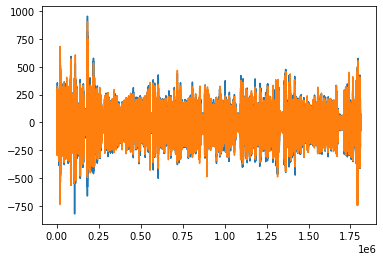

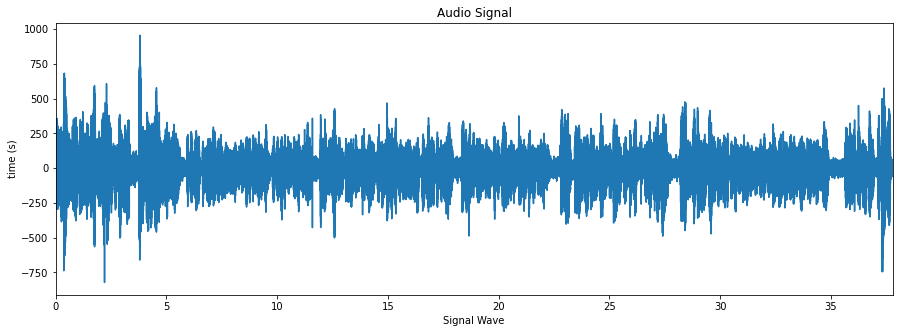

In [20]:
import wave
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
obj = wave.open(r"../Splited_speaker\23-06-2022 14 12 36\2.wav",'rb')
sample_freq = obj.getframerate()
n_samples = obj.getnframes()
signal_wave = obj.readframes(-1) 
obj.close()
t_audio = n_samples / sample_freq 
signal_array = np.frombuffer(signal_wave,dtype=np.int16)
time = np.linspace(0, t_audio, num = n_samples * 2)

plt.figure(figsize=(15,5))
plt.plot(time, signal_array)
plt.title("Audio Signal")
plt.xlabel('Signal Wave')
plt.ylabel('time (s)')
plt.xlim(0,t_audio)
plt.show()